<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import ipywidgets as widgets
import statsmodels.formula.api as sm 
from plotly import graph_objs as go
from scipy import stats
from scipy.stats import anderson
from statistics import mode, multimode
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from statsmodels.formula.api import ols
import missingno as msno

In [2]:
datos201901 = pd.read_csv("SB11_20191.txt", sep="¬", engine='python')
datos201902 = pd.read_csv("SB11_20192.txt", sep="¬", engine='python')
datos202001 = pd.read_csv("SB11_20201.txt", sep="¬", engine='python')
datos202002 = pd.read_csv("SB11_20202.txt", sep="¬", engine='python')
datos202101 = pd.read_csv("SB11_20211.txt", sep="¬", engine='python')

#### 1.  ¿Qué dimensiones tienen los datos?

In [3]:
print("Dimensiones de los dataframes (filas, columnas):")
print("2019 01: " +str(datos201901.shape))
print("2019 02: " +str(datos201902.shape))
print("2020 01: " +str(datos202001.shape))
print("2020 02: " +str(datos202002.shape))
print("2021 01: " +str(datos202101.shape))

Dimensiones de los dataframes (filas, columnas):
2019 01: (21083, 82)
2019 02: (546212, 82)
2020 01: (15435, 81)
2020 02: (504872, 81)
2021 01: (15528, 78)


#### 2.¿Con cuántos años y periodos de evaluación se cuenta?

Se cuentan con 3 años de información: 2019, 2020 y 2021 y con 2 periodos por año , a excepción de 2021 con el cual solo se cuenta un periodo

In [4]:
#Se seleccionan las columnas con las cuales se va a trabajar 

cols = ['ESTU_GENERO','PERIODO','ESTU_CONSECUTIVO','ESTU_DEPTO_RESIDE','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET',
       'FAMI_TIENECOMPUTADOR','FAMI_SITUACIONECONOMICA','COLE_NATURALEZA','COLE_JORNADA','PUNT_GLOBAL','PERCENTIL_GLOBAL']

datos_finales = pd.concat(
    [
        datos201901.loc[:,cols],
        datos201902.loc[:,cols],
        datos202001.loc[:,cols],
        datos202002.loc[:,cols],
        datos202101.loc[:,cols]
    ],
    ignore_index=True
)

del datos201901, datos201902, datos202001, datos202002, datos202101

datos_finales['PERIODO'] = datos_finales['PERIODO'].astype('object')
datos_finales['PUNT_GLOBAL'] = datos_finales['PUNT_GLOBAL'].astype(int)
datos_finales['PERCENTIL_GLOBAL'] = datos_finales['PERIODO'].astype(float)


datos_finales.info()
datos_finales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103130 entries, 0 to 1103129
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   ESTU_GENERO              1103010 non-null  object 
 1   PERIODO                  1103130 non-null  object 
 2   ESTU_CONSECUTIVO         1103130 non-null  object 
 3   ESTU_DEPTO_RESIDE        1101962 non-null  object 
 4   FAMI_ESTRATOVIVIENDA     1047936 non-null  object 
 5   FAMI_TIENEINTERNET       1054910 non-null  object 
 6   FAMI_TIENECOMPUTADOR     1063164 non-null  object 
 7   FAMI_SITUACIONECONOMICA  1066036 non-null  object 
 8   COLE_NATURALEZA          1103130 non-null  object 
 9   COLE_JORNADA             1103130 non-null  object 
 10  PUNT_GLOBAL              1103130 non-null  int32  
 11  PERCENTIL_GLOBAL         1103130 non-null  float64
dtypes: float64(1), int32(1), object(10)
memory usage: 96.8+ MB


ESTU_GENERO PERIODO  ESTU_CONSECUTIVO ESTU_DEPTO_RESIDE  \
0           F   20191  SB11201910008548             VALLE   
1           F   20191  SB11201910004475             VALLE   
2           M   20191  SB11201910011427             VALLE   
3           M   20191  SB11201910041975             VALLE   
4           F   20191  SB11201910014490            BOGOTA   

  FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET FAMI_TIENECOMPUTADOR  \
0            Estrato 4                 Si                   Si   
1            Estrato 3                 Si                   No   
2            Estrato 2                 Si                   No   
3            Estrato 2                 Si                   Si   
4            Estrato 6                 Si                   Si   

  FAMI_SITUACIONECONOMICA COLE_NATURALEZA COLE_JORNADA  PUNT_GLOBAL  \
0                   Mejor         OFICIAL        NOCHE          235   
1                   Mejor         OFICIAL        NOCHE          217   
2                   Igual         OFICIAL        NOCHE          246   
3                   Igual         OFICIAL        NOCHE          255   
4                   Igual      NO OFICIAL     COMPLETA          280   

   PERCENTIL_GLOBAL  
0           20191.0  
1           20191.0  
2           20191.0  
3           20191.0  
4           20191.0

#### 3.¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

In [5]:
filtro_nulos = datos_finales.isna().apply(lambda x: True if x.sum()>0 else False, axis=1)

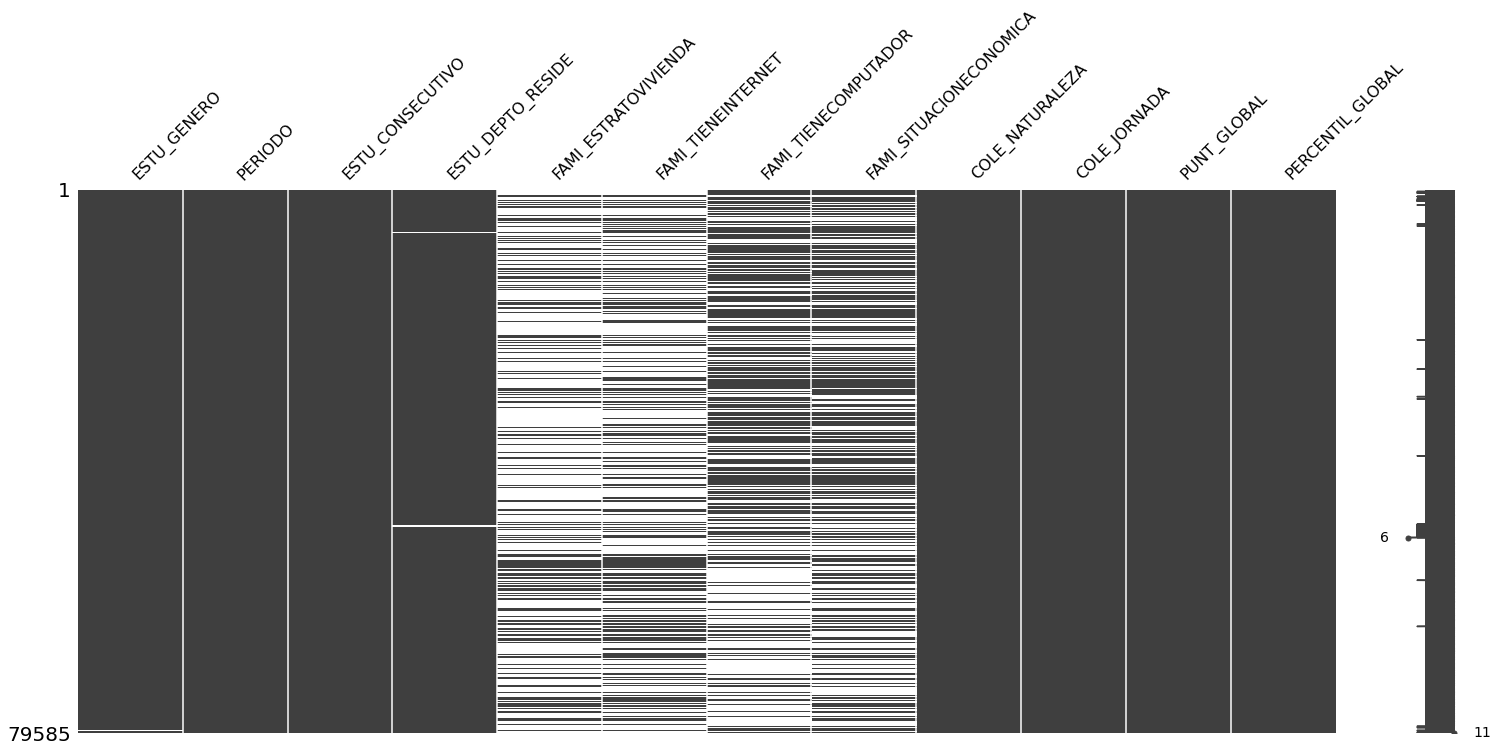

In [6]:
msno.matrix(datos_finales[filtro_nulos])
plt.show()

Se puede ver que las variables con valores nulos son estrato(5%nulos), tiene internet (4%), tiene computador (3%), departamento con (0.1%) 

In [9]:
dfNulos = datos_finales.isnull().sum().reset_index().rename(columns={'index':'columna', 0:'nulos'})
dfNulos['pje'] = dfNulos['nulos']/datos_finales.shape[0]
dfNulos.sort_values(by='pje', ascending=False)

columna  nulos       pje
4      FAMI_ESTRATOVIVIENDA  55194  0.050034
5        FAMI_TIENEINTERNET  48220  0.043712
6      FAMI_TIENECOMPUTADOR  39966  0.036230
7   FAMI_SITUACIONECONOMICA  37094  0.033626
3         ESTU_DEPTO_RESIDE   1168  0.001059
0               ESTU_GENERO    120  0.000109
1                   PERIODO      0  0.000000
2          ESTU_CONSECUTIVO      0  0.000000
8           COLE_NATURALEZA      0  0.000000
9              COLE_JORNADA      0  0.000000
10              PUNT_GLOBAL      0  0.000000
11         PERCENTIL_GLOBAL      0  0.000000

#### Correlacion entre campos con valores nulos

Se puede evidenciar el siguiente grafica que hay una correlacion de nulos muy alta entre la variable "estrato" y la variable "tiene internet", por lo cual se llega a pensar que es muy probable que cuando hay nulos en una de estas abra nulos en la otra. Lo mismo sucede con las variables "situacion economica"y "tiene computador".

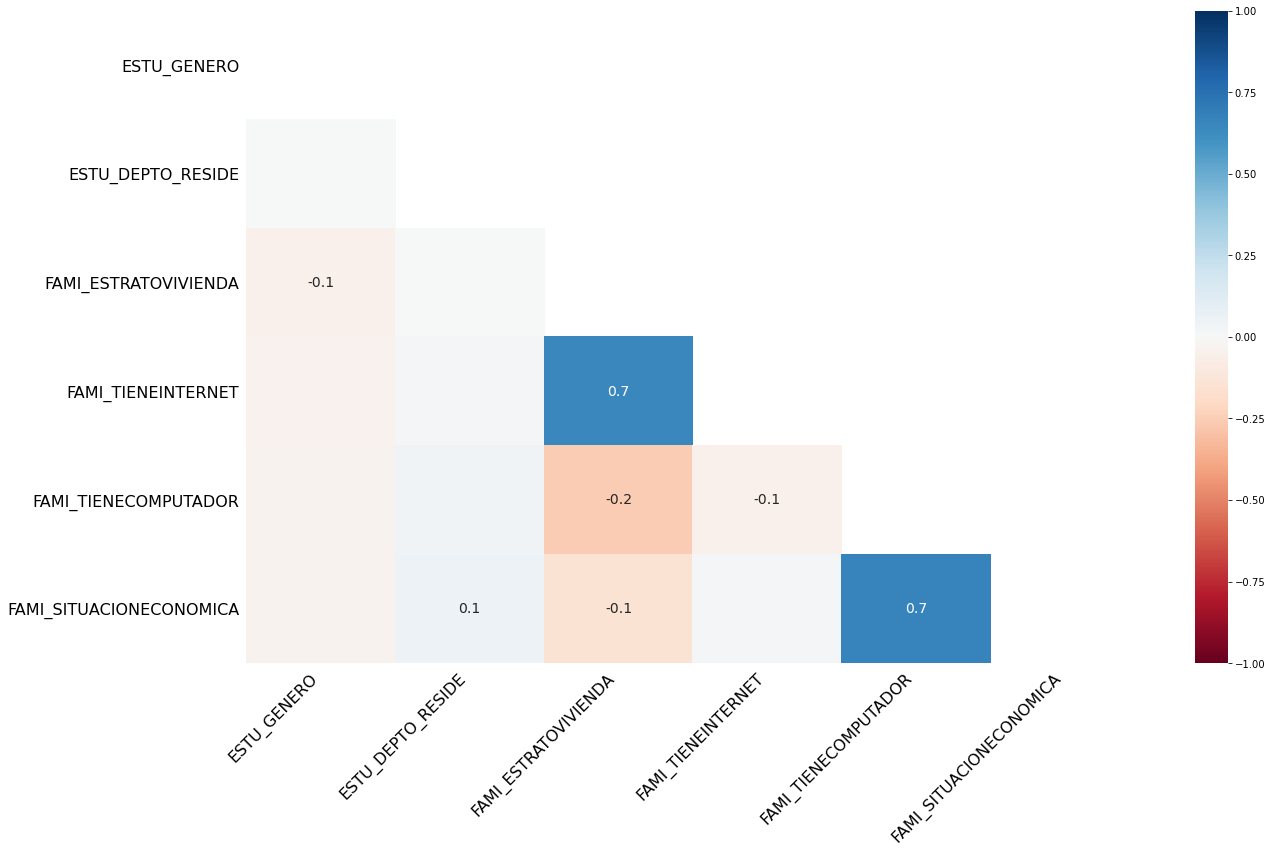

In [8]:
msno.heatmap(datos_finales[filtro_nulos])
plt.show()

### Imputación de valores nulos

Como el porcentaje de valores nulos no es muy alto respecto al total (5% como maximo) se decide imputar con valores de tendencia central como la moda y la media , para las variables categoricas y numericas respectivamente.

In [10]:
catCols = ['ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_SITUACIONECONOMICA', 'ESTU_GENERO']
numCols = ['PERCENTIL_GLOBAL']

# Imputación de nulos en variables categoricas
for col in catCols:
    datos_finales[col].fillna(datos_finales[col].mode().values[0], inplace=True)

# Imputación de nulos variables numericas
datos_finales[numCols[0]].fillna(datos_finales[numCols[0]].mode().values[0], inplace=True)

In [11]:
datos_finales.isnull().sum()

ESTU_GENERO                0
PERIODO                    0
ESTU_CONSECUTIVO           0
ESTU_DEPTO_RESIDE          0
FAMI_ESTRATOVIVIENDA       0
FAMI_TIENEINTERNET         0
FAMI_TIENECOMPUTADOR       0
FAMI_SITUACIONECONOMICA    0
COLE_NATURALEZA            0
COLE_JORNADA               0
PUNT_GLOBAL                0
PERCENTIL_GLOBAL           0
dtype: int64

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

count        mean        std  min    25%    50%    75%    max
ESTU_GENERO                                                                  
F            598472.0  245.537372  50.372017  0.0  207.0  242.0  280.0  492.0
M            504658.0  253.630538  52.638619  0.0  214.0  251.0  290.0  500.0

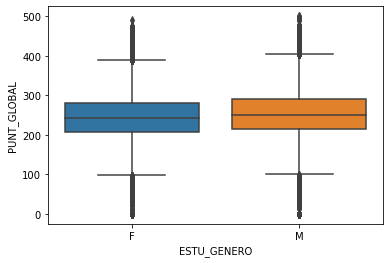

In [13]:
# Código
box_genero=sns.boxplot(x="ESTU_GENERO",y="PUNT_GLOBAL", data=datos_finales)
datos_finales.groupby(["ESTU_GENERO"])["PUNT_GLOBAL"].describe()

Parece no exstir mucha diferencia ente los puntajes de hombres y mujeres 

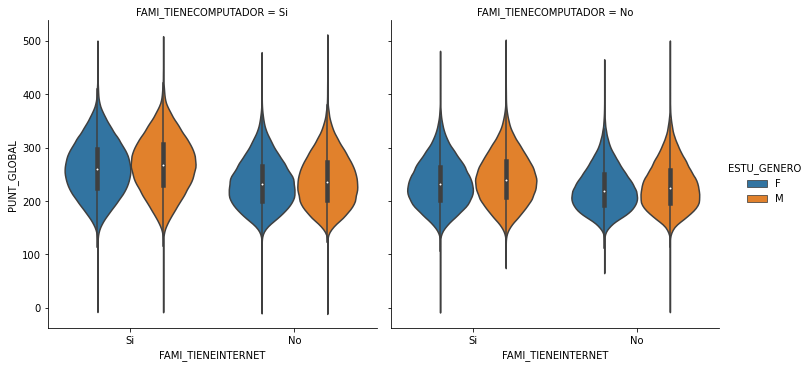

In [14]:
binario= ['FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',"ESTU_GENERO"]
g=sns.catplot(x='FAMI_TIENEINTERNET',y="PUNT_GLOBAL",hue="ESTU_GENERO",col='FAMI_TIENECOMPUTADOR', data=datos_finales,kind="violin")

De acuerdo a esta grafica se puede ver que hay mejores puntajes si la familia tiene internet y computador

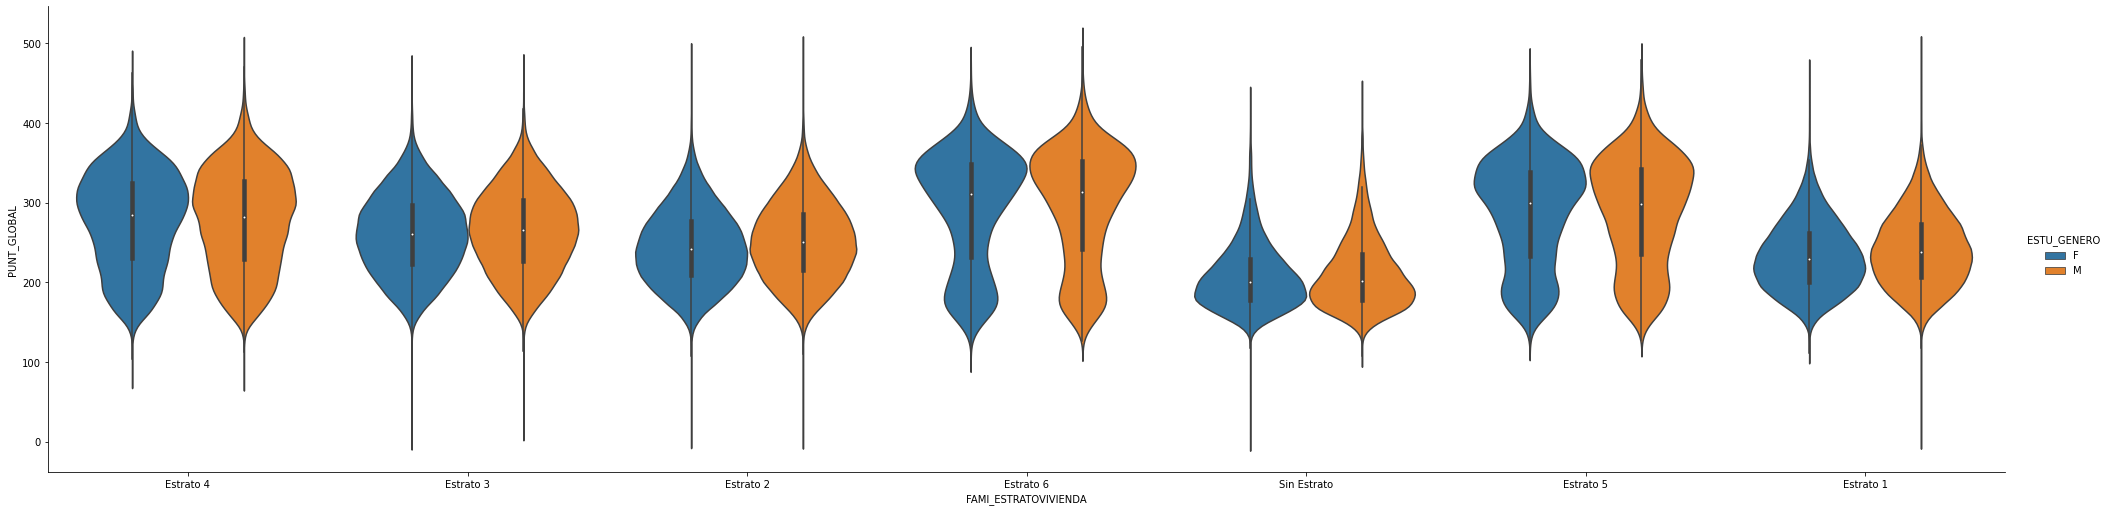

In [15]:
g=sns.catplot(x='FAMI_ESTRATOVIVIENDA',y="PUNT_GLOBAL",hue="ESTU_GENERO", data=datos_finales,kind="violin", height=7 , aspect=4)

En esta grafica se puede evidenciar que no hay cambio significativo en el puntaje por genero , pero por estrato parece existir una tendencia, ya que tienen mayores puntajes estrato 4, 5 y 6 , podria relacionarse a que son estratos con mas recursos tecnologicos y mayor eduacion y esto se podria correlacionar con los puntajes.

<AxesSubplot:xlabel='ESTU_DEPTO_RESIDE'>

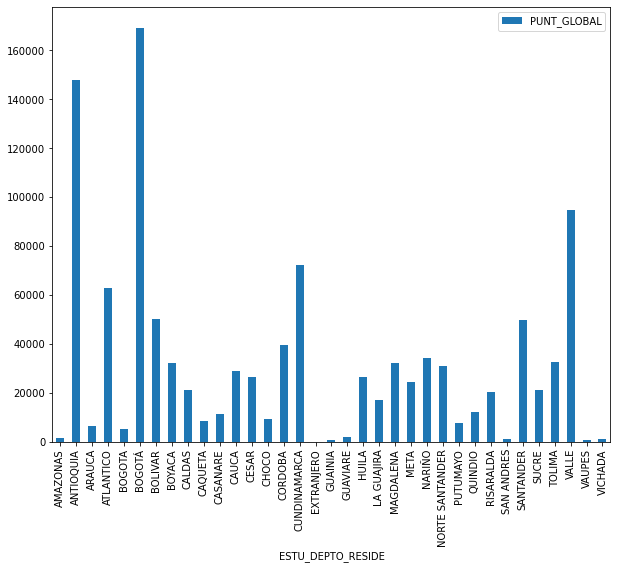

In [16]:
x=10
y=8
datos_finales[['ESTU_DEPTO_RESIDE',"PUNT_GLOBAL"]].groupby(['ESTU_DEPTO_RESIDE']).count().plot(kind="bar",figsize=(x,y))

Se puede ver que hay una tendencia por departamento en la puntuacion final , ya que los departamentos como Bogota, Antioquia y Valle son los que tienen mayores puntajes , podria relacionarse a que son ciudades con mas recursos tecnologicos y mayor eduacion y esto se podria correlacionar con los puntajes.

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

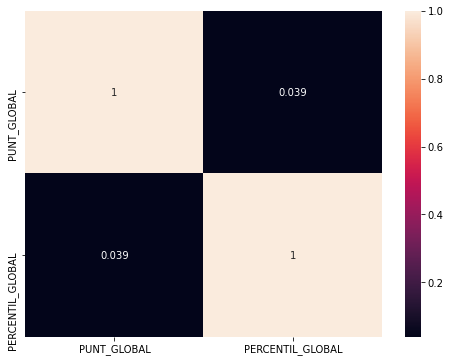

In [17]:
# Correlacion
corr_df = datos_finales.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()


Como la mayoria de variables son categoricas , las correlaciones que se pueden visualizar son muy pocas, vemos que "Puntuacion Global"y "Percentil global" estan poco correlacionadas

### Regresion Multivariada

In [19]:
modelo=ols('PUNT_GLOBAL~C(ESTU_GENERO)+C(PERIODO)+C(ESTU_DEPTO_RESIDE)+C(FAMI_ESTRATOVIVIENDA)+C(FAMI_TIENEINTERNET)+C(FAMI_TIENECOMPUTADOR)+C(FAMI_SITUACIONECONOMICA)+C(COLE_NATURALEZA)+C(COLE_JORNADA)', data=datos_finales)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     8121.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:27:20   Log-Likelihood:            -5.7275e+06
No. Observations:             1103130   AIC:                         1.146e+07
Df Residuals:                 1103074   BIC:                         1.146e+07
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Esta regresion multivariada no es la mejor opcion para modelar esta data , ya que tiene muchas variables categoricas y se puede ver que tiene un R2 bajstante bajo de 0.288 , aun asi se podrian hacer pruebas de seleccion de variables e intentar mejorar un poco el modelo. Aun asi parece ser que por la naturaleza de los datos un modelo de clasificacion seria la mejor opcion

### K means

In [20]:
catCols = ['ESTU_GENERO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
           'FAMI_TIENECOMPUTADOR', 'FAMI_SITUACIONECONOMICA', 'COLE_NATURALEZA', 'COLE_JORNADA']

numCols = ['PUNT_GLOBAL']

Se tienen que estandarizar las variables numericas y convertir en dummies las categoricas

In [34]:
scaller = StandardScaler()
modelDf = pd.concat(
    [
        pd.get_dummies(data=datos_finales[catCols], drop_first=True),
        pd.Series([x[0] for x in scaller.fit_transform(datos_finales[numCols]).tolist()], name='z_PUNT_GLOBAL')
    ],
    axis = 1
)

modelDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103130 entries, 0 to 1103129
Data columns (total 18 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   ESTU_GENERO_M                     1103130 non-null  uint8  
 1   FAMI_ESTRATOVIVIENDA_Estrato 2    1103130 non-null  uint8  
 2   FAMI_ESTRATOVIVIENDA_Estrato 3    1103130 non-null  uint8  
 3   FAMI_ESTRATOVIVIENDA_Estrato 4    1103130 non-null  uint8  
 4   FAMI_ESTRATOVIVIENDA_Estrato 5    1103130 non-null  uint8  
 5   FAMI_ESTRATOVIVIENDA_Estrato 6    1103130 non-null  uint8  
 6   FAMI_ESTRATOVIVIENDA_Sin Estrato  1103130 non-null  uint8  
 7   FAMI_TIENEINTERNET_Si             1103130 non-null  uint8  
 8   FAMI_TIENECOMPUTADOR_Si           1103130 non-null  uint8  
 9   FAMI_SITUACIONECONOMICA_Mejor     1103130 non-null  uint8  
 10  FAMI_SITUACIONECONOMICA_Peor      1103130 non-null  uint8  
 11  COLE_NATURALEZA_OFICIAL           110

In [22]:
modelo = KMeans(n_clusters=4, random_state=2021)

In [23]:
modelo.fit(modelDf)
clusters = modelo.predict(modelDf).tolist()
clusters[:5]

[3, 3, 1, 1, 0]

### ACP

In [24]:
pca = PCA(n_components=2, random_state=2021)

In [25]:
pca_df = pd.DataFrame(data=pca.fit_transform(modelDf).tolist(), columns=['PC1', 'PC2'], index=modelDf.index)
pca_df['cluster'] = clusters
pca_df.info()
pca_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103130 entries, 0 to 1103129
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   PC1      1103130 non-null  float64
 1   PC2      1103130 non-null  float64
 2   cluster  1103130 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 25.2 MB


PC1       PC2  cluster
0 -0.208497 -0.645881        3
1 -0.695761 -0.329980        3
2 -0.186388  0.088175        1
3  0.180106 -0.440703        1
4  0.803609 -0.463279        0

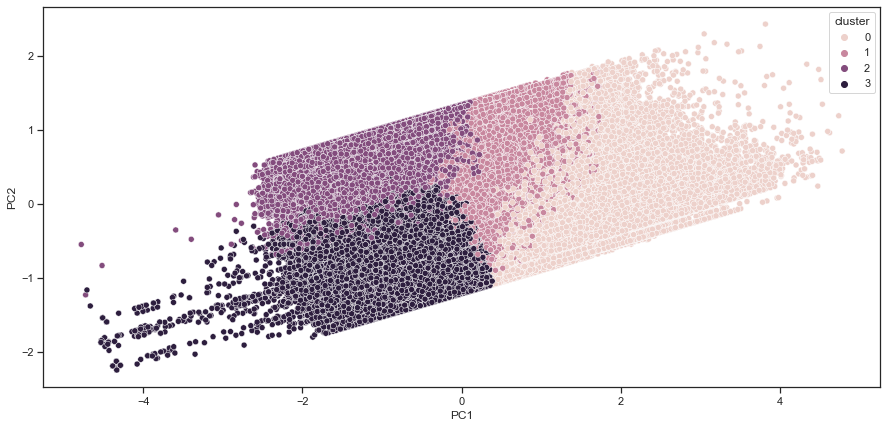

In [26]:
f, a = plt.subplots(1,1,figsize=(15,7))

sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', hue = 'cluster')
plt.show()

In [27]:
datos_finales['cluster'] = clusters

#### Distribucion de los datos por cluster

In [28]:
datos_finales['cluster'].value_counts()

1    332540
3    299622
2    269123
0    201845
Name: cluster, dtype: int64

Con la clasificacion y el PCA se puede ver que la poblacion se puede segmentar por perfiles , lo cual nos daria un buen indicio de establcer perfiles de mayor puntaje , lo cual veremos en lo siguiente.

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

### Conclusion
En la siguiente herramienta se puede interactuar con los departamentos, los estratos en los diferentes cluster , para ver la distribucion del puntaje por categoria y encontrar hallazgos de cual podria ser el perfil con mayor puntaje.

Se puede evidenciar que en las principales ciudades , en los estratos 4, 5 y 6 se ven puntajes mayores en el cluster 3, con lo cual podemos hacer un perfilamiento mas profundo de quien obtienen mejores resultados

In [35]:
zona = widgets.Dropdown(
                        description = 'Departamento',
                        options = datos_finales['ESTU_DEPTO_RESIDE'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )

estrato = widgets.Dropdown(
                        description = 'Estrato',
                        options = datos_finales['FAMI_ESTRATOVIVIENDA'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )
cluster= widgets.Dropdown(
                        description = 'cluster',
                        options = datos_finales['cluster'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )
####
fig = go.FigureWidget(
                        data = go.Box(name = 'Puntaje'),  
    
                        layout = go.Layout(
                                            title = 'Puntaje',
                                            xaxis_title = 'Puntaje',
                                            
                                          )
                     )

fig2 = go.FigureWidget(
                        data = go.Box(name = 'Puntaje'),  
    
                        layout = go.Layout(
                                            title = 'Puntaje',
                                            xaxis_title = 'Puntaje',
                                            
                                          )
                     )

fig1 = go.FigureWidget(
                        data = go.Histogram(name = 'Puntaje'),  
    
                        layout = go.Layout(
                                            title = 'Puntaje',
                                            xaxis_title = 'Puntaje',
                                            
                                          )
                     )

def filtrar():
    filtrar_lista = [i and j and k for i, j, k in zip(
                                                        datos_finales['FAMI_ESTRATOVIVIENDA'] >= estrato.value, 
                                                        datos_finales['ESTU_DEPTO_RESIDE'] == zona.value,
                                                        datos_finales['cluster'] == cluster.value
                                                     )
                    ]
    
    df_temporal = datos_finales[filtrar_lista]
    fig.data[0].x = df_temporal['PUNT_GLOBAL']
    fig1.data[0].x = df_temporal['PUNT_GLOBAL']
    fig2.data[0].x = datos_finales['PUNT_GLOBAL']
    
def respuesta(change):
    filtrar()

zona.observe(respuesta, names = 'value')
estrato.observe(respuesta, names = 'value')
cluster.observe(respuesta, names = 'value')

filtrar()

parte_inferior = widgets.HBox([zona, estrato, cluster])

visualizacion = widgets.VBox(
              [parte_inferior,
              fig1,fig2]
            )
display(visualizacion)